In [1]:
import pandas as pd #used for data manipulation.
import numpy as np #used for mathematical functions.
import matplotlib.pyplot as plt #used for charts.
import matplotlib
%matplotlib inline
import seaborn as sns 


from IPython.core.pylabtools import figsize
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import sklearn
from sklearn.model_selection import train_test_split
import datetime as dt
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [2]:
algerianff = pd.read_excel('Algerian_forest_fires_dataset_UPDATE.xlsx')

The original dataset didn't have region column, since the data is from two regions a separate column for regions created and combined the two separated data within one datasets

In [3]:
algerianff.columns = algerianff.columns.str.strip() 

Removing the white spaces before and after the column names for the entire dataset

In [4]:
algerianff['Classes'] = algerianff['Classes'].map(str)
algerianff['Classes'] = algerianff['Classes'].str.strip()

In [5]:
algerianff.head()

,Region,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,Bejaia,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,Bejaia,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,Bejaia,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,Bejaia,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,Bejaia,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [6]:
algerianff.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [7]:
algerianff.shape

(244, 15)

In [8]:
algerianff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Region       244 non-null    object 
 1   day          244 non-null    int64  
 2   month        244 non-null    int64  
 3   year         244 non-null    int64  
 4   Temperature  244 non-null    int64  
 5   RH           244 non-null    int64  
 6   Ws           244 non-null    int64  
 7   Rain         244 non-null    float64
 8   FFMC         244 non-null    float64
 9   DMC          244 non-null    float64
 10  DC           244 non-null    float64
 11  ISI          244 non-null    float64
 12  BUI          244 non-null    float64
 13  FWI          244 non-null    float64
 14  Classes      244 non-null    object 
dtypes: float64(7), int64(6), object(2)
memory usage: 28.7+ KB


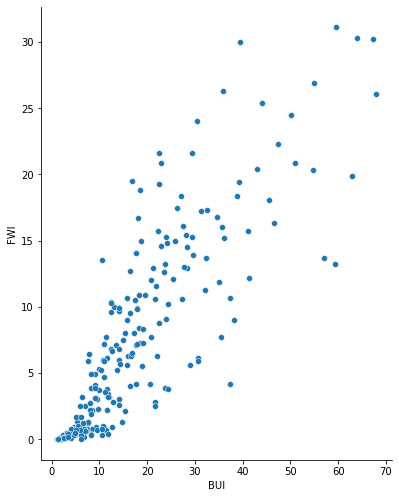

In [ ]:
sns.pairplot(algerianff, x_vars=['BUI'], y_vars='FWI',height=7, aspect=0.8, kind='scatter');

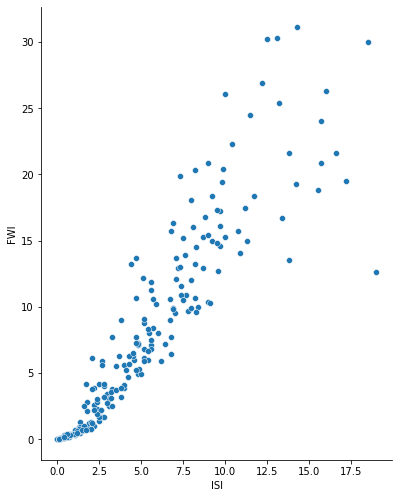

In [ ]:
sns.pairplot(algerianff, x_vars=['ISI'], y_vars='FWI',height=7, aspect=0.8, kind='scatter');

In [ ]:
algerianff.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
day,1.000000e+00,2.232788e-17,NaN,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527929,0.179301,0.517224,0.350234
month,2.232788e-17,1.000000e+00,NaN,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127672,0.063545,0.085567,0.081732
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,9.577222e-02,-5.901677e-02,NaN,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839
RH,-7.420934e-02,-3.788419e-02,NaN,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457
Ws,4.700086e-02,-4.144673e-02,NaN,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957
Rain,-1.122654e-01,3.532207e-02,NaN,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755
FFMC,2.240321e-01,1.557668e-02,NaN,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430
DMC,4.915710e-01,6.817778e-02,NaN,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191
DC,5.279285e-01,1.276719e-01,NaN,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041


Some of the variables are highly correlated

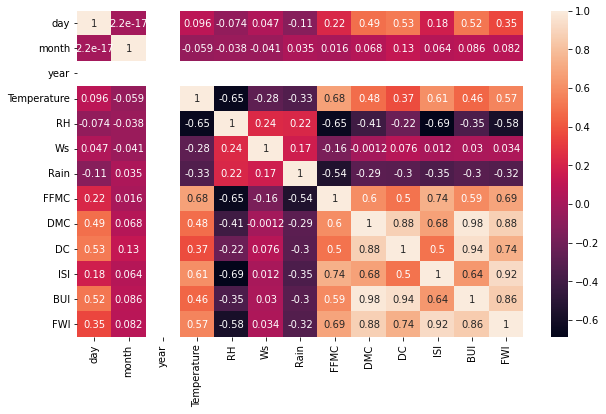

In [9]:
plt.figure(figsize= (10,6))
corrMatrix = algerianff.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

**Linear Regression**

In [ ]:
regre=np.polyfit(algerianff['BUI'], algerianff['FWI'], deg = 1)

In [ ]:
regre

array([ 0.44821926, -0.42414104])

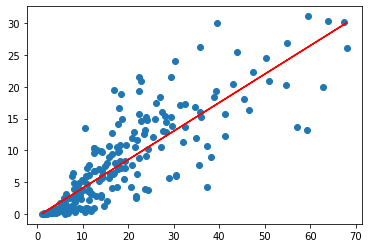

In [ ]:
trend = np.polyval(regre, algerianff['BUI'])
plt.scatter(algerianff['BUI'], algerianff['FWI'])
plt.plot(algerianff['BUI'], trend, 'r');

In [ ]:
reg = np.polyfit(algerianff['DMC'], algerianff['FWI'], deg = 1)
reg

array([ 0.52564857, -0.66385077])

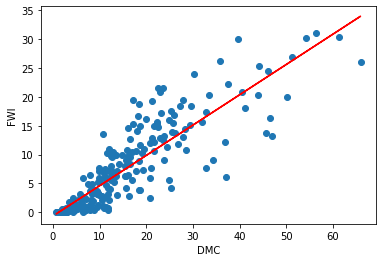

In [ ]:
trend2 = np.polyval(reg, algerianff['DMC'])
plt.scatter(algerianff['DMC'], algerianff['FWI'])
plt.xlabel("DMC")
plt.ylabel("FWI")
plt.plot(algerianff['DMC'], trend2, 'r');

In [ ]:
predict = np.poly1d(reg)
predict(45)

22.990335036457374

The prediction indicates that when the DMC is 45 the FWI will be 22.99

In [ ]:
reg3 = np.polyfit(algerianff['DC'], algerianff['BUI'], deg = 1)
reg3

array([0.28083551, 2.83150783])

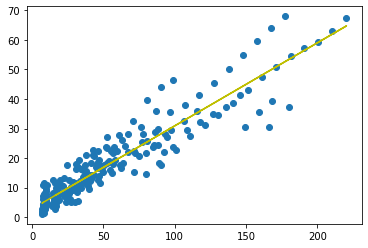

In [ ]:
trend3 = np.polyval(reg3, algerianff['DC'])
plt.scatter(algerianff['DC'], algerianff['BUI'])
plt.plot(algerianff['DC'], trend3, 'y');

In [ ]:
reg4 = np.polyfit(algerianff['Temperature'], algerianff['RH'], deg = 1)
reg4

array([ -2.68059621, 148.17901755])

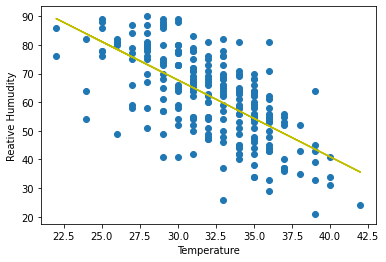

In [ ]:
trend4 = np.polyval(reg4, algerianff['Temperature'])
plt.scatter(algerianff['Temperature'], algerianff['RH'])
plt.xlabel("Temperature")
plt.ylabel("Reative Humudity")
plt.plot(algerianff['Temperature'], trend4, 'y');

In [ ]:
predict = np.poly1d(reg3)
predict(1)

3.112343335118045

In [ ]:
algerianff.groupby('month')['BUI'].mean()

month
6    10.295000
7    16.908065
8    29.420968
9     9.636667
Name: BUI, dtype: float64

In [ ]:
algerianff.groupby('month')['Temperature'].mean()

month
6    30.800000
7    33.048387
8    35.338710
9    29.366667
Name: Temperature, dtype: float64

In [ ]:
algerianff.groupby('month')['Rain'].mean()

month
6    0.975000
7    0.451613
8    0.448387
9    1.188333
Name: Rain, dtype: float64

In [90]:
algerianff['outcome'] = algerianff['Classes']

In [91]:
algerianff['outcome'] = algerianff['Classes']

In [ ]:
algerianff.head()

,Region,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,outcome
0,Bejaia,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,not fire
1,Bejaia,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,not fire
2,Bejaia,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,not fire
3,Bejaia,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,not fire
4,Bejaia,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,not fire


In [92]:
algerianff['outcome'], unique = pd.factorize(algerianff['outcome'])

In [93]:
unique

Index(['not fire', 'fire'], dtype='object')

The white spaces have to be removed to prepare the data for logistic regression

In [95]:
#algerianff['outcome'] = algerianff['outcome'].map(str)

In [94]:
#algerianff['outcome'] = algerianff['outcome'].str.strip()

In [ ]:
algerianff['Classes'] = algerianff['Classes'].map(str)
algerianff['Classes'] = algerianff['Classes'].str.strip()

In [96]:
algerianff['outcome'] = algerianff['Classes']

In [97]:
algerianff['outcome'], unique = pd.factorize(algerianff['outcome'])

In [ ]:
unique

Index(['not fire', 'fire'], dtype='object')

No more white spaces befor or after the values in the Classes variable

In [ ]:
algerianff.head()

,Region,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,outcome
0,Bejaia,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,Bejaia,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,Bejaia,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,Bejaia,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,Bejaia,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


Spliting the data into training and test data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(algerianff.iloc[ :, :], algerianff.iloc[ :, :], test_size=0.03, random_state=0);

In [11]:
X_train.shape

(236, 15)

In [12]:
X_test.shape

(8, 15)

In [ ]:
X_test

,Region,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,outcome
64,Bejaia,4,8,2012,34,69,13,0.0,85.0,8.2,19.8,4.0,8.2,3.9,fire,1
63,Bejaia,3,8,2012,35,63,14,0.3,76.6,5.7,10.0,1.7,5.5,0.8,not fire,0
55,Bejaia,26,7,2012,36,53,19,0.0,89.2,17.1,98.6,10.0,23.9,15.3,fire,1
111,Bejaia,20,9,2012,28,84,18,0.0,83.8,13.5,49.3,4.5,16.0,6.3,fire,1
225,Sidi-Bel Abbes,12,9,2012,31,72,14,0.0,84.2,8.3,25.2,3.8,9.1,3.9,fire,1
92,Bejaia,1,9,2012,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0.1,not fire,0
76,Bejaia,16,8,2012,36,61,18,0.3,80.2,11.7,90.4,2.8,17.6,4.2,fire,1
181,Sidi-Bel Abbes,30,7,2012,36,56,16,0.0,88.9,23.8,57.1,8.2,23.8,13.2,fire,1


In [ ]:
reg5 = np.polyfit(X_test['DMC'], X_test['FWI'], deg = 1)
reg5

array([ 0.70995997, -1.98905171])

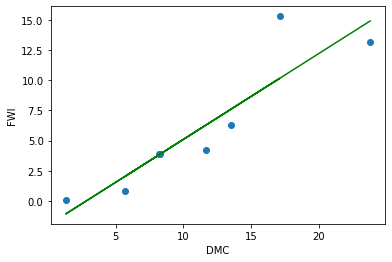

In [ ]:
trend5 = np.polyval(reg5, X_test['DMC'])
plt.scatter(X_test['DMC'], X_test['FWI'])
plt.xlabel("DMC")
plt.ylabel("FWI")
plt.plot(X_test['DMC'], trend5, 'g');

In [13]:
X_train2, X_test2, y_train2, y_test2 =train_test_split(algerianff[['DMC']], algerianff.FWI, train_size=0.7)

In [14]:
lr = LinearRegression().fit(X_train2, y_train2)

In [15]:
y_pred2 = lr.predict(X_test2)

In [ ]:
y_pred2

array([ 0.20232184, -0.46503389,  3.03858369,  8.54426847, 15.49589066,
        5.65239364, 25.28377471,  3.81716538,  2.31561498,  1.25896841,
        6.26413639,  5.37432875,  5.70800661,  3.37226156,  7.93252571,
        1.81509819,  5.04065088,  1.59264628,  8.32181656,  7.76568678,
       13.32698454, -0.13135603,  8.26620358,  0.5359997 ,  2.48245392,
       14.99537386,  0.5359997 ,  6.09729746,  9.54530206, 17.33111892,
       10.76878757, 12.71524178,  5.15187684, -0.35380794,  4.48452111,
        4.37329515, 35.79462746,  7.87691274,  1.5370333 , 14.60608302,
        4.54013408,  3.7615524 ,  5.76361959,  2.87174476,  8.65549442,
        0.92529055,  9.712141  ,  4.54013408,  8.65549442, -0.24258198,
        6.09729746, 27.06338999,  4.59574706,  5.15187684,  5.4855547 ,
        3.03858369,  5.20748982,  7.82129976,  3.14980965, 12.99330667,
        9.43407611,  6.31974937, -0.35380794,  2.37122796,  0.81406459,
       -0.24258198,  6.15291043, 14.88414791,  9.37846313,  5.42

In [80]:
y_test2.shape

(74,)

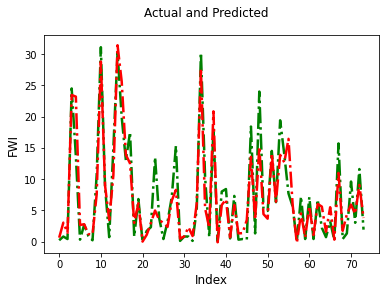

In [85]:
a = [i for i in range(0,74,1)]
plt.plot(a,y_test2, color="green", linewidth=2.5, linestyle="-.")
plt.plot(a,y_pred2, color="red",  linewidth=2.5, linestyle="-.")
plt.suptitle('Actual and Predicted', fontsize=12)              
plt.xlabel('Index', fontsize=12)                              
plt.ylabel('FWI', fontsize=12);

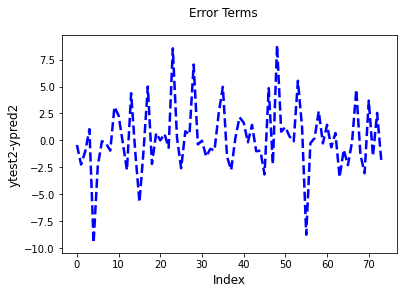

In [73]:
a = [i for i in range(0,74,1)]
plt.plot(a,y_test2-y_pred2, color="blue", linewidth=2.5, linestyle="--")
plt.suptitle('Error Terms', fontsize=12)             
plt.xlabel('Index', fontsize=12)                      
plt.ylabel('ytest2-ypred2', fontsize=12)  ;

In [79]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test2, y_pred2)
mse

9.604534195802064

In [78]:
r_squ = r2_score(y_test2, y_pred2)
r_squ

0.8523483319722429

**Logistic Regression**

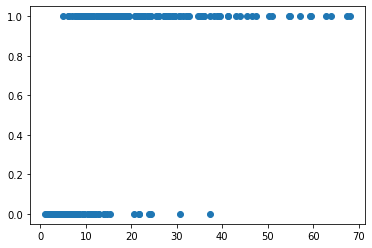

In [98]:
plt.scatter(algerianff['BUI'], algerianff['outcome'], cmap='rainbow');

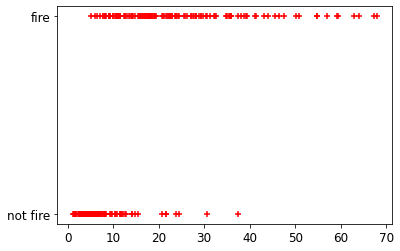

In [ ]:
plt.scatter(algerianff.BUI, algerianff.Classes, marker='+', color='red');

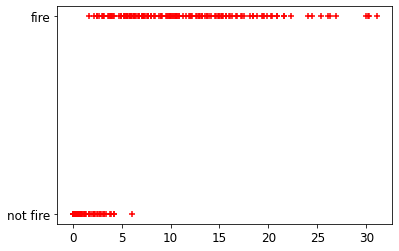

In [ ]:
plt.scatter(algerianff.FWI, algerianff.Classes, marker='+', color='red');

In [ ]:
algerianff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Region       244 non-null    object 
 1   day          244 non-null    int64  
 2   month        244 non-null    int64  
 3   year         244 non-null    int64  
 4   Temperature  244 non-null    int64  
 5    RH          244 non-null    int64  
 6    Ws          244 non-null    int64  
 7   Rain         244 non-null    float64
 8   FFMC         244 non-null    float64
 9   DMC          244 non-null    float64
 10  DC           244 non-null    float64
 11  ISI          244 non-null    float64
 12  BUI          244 non-null    float64
 13  FWI          244 non-null    float64
 14  Classes      244 non-null    object 
 15  outcome      244 non-null    int64  
dtypes: float64(7), int64(7), object(2)
memory usage: 30.6+ KB


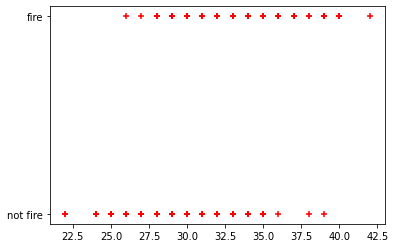

In [114]:
plt.scatter(algerianff.Temperature, algerianff.Classes, marker='+', color='red');

In [140]:
X_train3, X_test3, y_train3, y_test3 =train_test_split(algerianff[['DMC']], algerianff.Classes, train_size=0.7, random_state=1)

In [141]:
X_train3.shape

(170, 1)

In [142]:
X_test3.shape

(74, 1)

In [143]:
y_train3.shape

(170,)

In [144]:
X_train3

,DMC
59,28.5
102,1.9
147,16.5
223,4.7
88,50.2
...,...
137,4.2
72,15.6
140,4.4
235,26.1


In [145]:
log_reg = LogisticRegression()
log_reg.fit(X_train3, y_train3)

LogisticRegression()

In [146]:
log_reg

LogisticRegression()

In [120]:
y_pred3 = log_reg.predict(X_test3)

In [121]:
log_reg.predict(X_test3)

array(['fire', 'fire', 'not fire', 'fire', 'fire', 'fire', 'fire', 'fire',
       'not fire', 'fire', 'not fire', 'fire', 'not fire', 'not fire',
       'not fire', 'not fire', 'not fire', 'fire', 'not fire', 'fire',
       'not fire', 'fire', 'fire', 'fire', 'not fire', 'fire', 'not fire',
       'fire', 'fire', 'not fire', 'fire', 'not fire', 'fire', 'fire',
       'fire', 'fire', 'fire', 'not fire', 'not fire', 'not fire',
       'not fire', 'not fire', 'not fire', 'fire', 'fire', 'fire',
       'not fire', 'fire', 'fire', 'not fire', 'not fire', 'not fire',
       'fire', 'fire', 'fire', 'not fire', 'fire', 'fire', 'fire',
       'not fire', 'fire', 'fire', 'fire', 'fire', 'not fire', 'not fire',
       'not fire', 'fire', 'fire', 'not fire', 'not fire', 'fire',
       'not fire', 'fire'], dtype=object)

In [122]:
confusion_matrix(y_test3, y_pred3)

array([[33,  5],
       [ 9, 27]])

33 true positives, 27 true negatives, 5 false positives, and 9 false negatives

In [139]:
log_reg.score(X_test3, y_test3)

0.8378378378378378

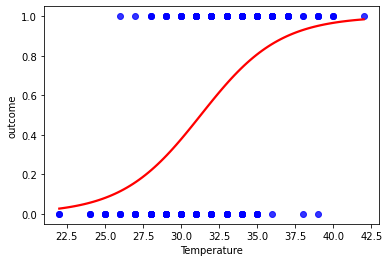

In [ ]:
sns.regplot(x=algerianff['Temperature'], y=algerianff['outcome'], logistic=True, ci=None,scatter_kws={'color': 'blue'}, line_kws={'color': 'red'});

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


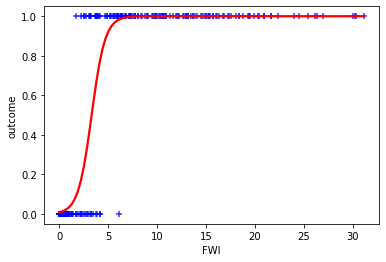

In [127]:
sns.regplot(x=algerianff['FWI'], y=algerianff['outcome'], marker= '+', logistic=True, ci=None, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'});
plt.show()

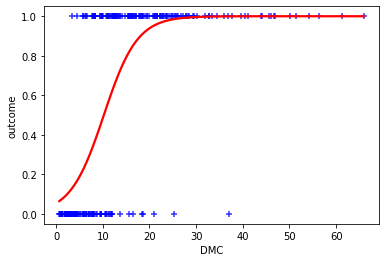

In [138]:
sns.regplot(x=algerianff['DMC'], y=algerianff['outcome'], marker='+', 
            logistic=True, ci=None, 
            scatter_kws={'color': 'blue'}, line_kws={'color': 'red'});

In [135]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(algerianff.iloc[ :, :], algerianff.iloc[ :, :], test_size=0.03, random_state=0);

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: invalid value encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


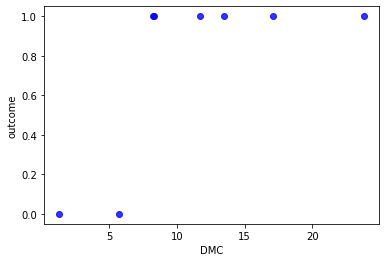

In [136]:
sns.regplot(x=X_test4['DMC'], y=X_test4['outcome'], logistic=True, ci=None, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'});